In [39]:
# Cell 1: Importing libraries and setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Setting up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print(" Welcome to Particle Physics with Pandas!")
print(" Ready to hunt for the Higgs boson!")

 Welcome to Particle Physics with Pandas!
 Ready to hunt for the Higgs boson!


In [40]:
# Cell 2: Loading the Higgs dataset
df = pd.read_csv('../data/raw/higgs.csv')

print(" Dataset loaded successfully!")
print(f" Dataset shape: {df.shape}")
print(f" Number of collision events: {df.shape[0]:,}")
print(f" Number of features: {df.shape[1]:,}")

 Dataset loaded successfully!
 Dataset shape: (10999999, 29)
 Number of collision events: 10,999,999
 Number of features: 29


In [41]:
# Cell 3: First look at the data structure
print(" First 5 collision events:")
print(df.head())

print("\n Column information:")
print(df.info())

print("\n Dataset description:")
print(df.describe())

 First 5 collision events:
   1.000000000000000000e+00  8.692932128906250000e-01  \
0                       1.0                  0.907542   
1                       1.0                  0.798835   
2                       0.0                  1.344385   
3                       1.0                  1.105009   
4                       0.0                  1.595839   

   -6.350818276405334473e-01  2.256902605295181274e-01  \
0                   0.329147                  0.359412   
1                   1.470639                 -1.635975   
2                  -0.876626                  0.935913   
3                   0.321356                  1.522401   
4                  -0.607811                  0.007075   

   3.274700641632080078e-01  -6.899932026863098145e-01  \
0                  1.497970                  -0.313010   
1                  0.453773                   0.425629   
2                  1.992050                   0.882454   
3                  0.882808                  -1.2

In [42]:
# Cell 4: Understanding the target variable (Signal vs Background)
# The first column is usually the label: 1 = Higgs signal, 0 = background
target_col = df.columns[0]
print(f"Target variable: '{target_col}'")
print("\n Signal vs Background distribution:")
print(df[target_col].value_counts())

# Calculating percentages
signal_pct = (df[target_col].sum() / len(df)) * 100
background_pct = ((len(df) - df[target_col].sum()) / len(df)) * 100

print(f"\nSignal events (Higgs): {df[target_col].sum():,} ({signal_pct:.1f}%)")
print(f"Background events: {(len(df) - df[target_col].sum()):,} ({background_pct:.1f}%)")

Target variable: '1.000000000000000000e+00'

 Signal vs Background distribution:
1.000000000000000000e+00
1.0    5829122
0.0    5170877
Name: count, dtype: int64

Signal events (Higgs): 5,829,122.0 (53.0%)
Background events: 5,170,877.0 (47.0%)


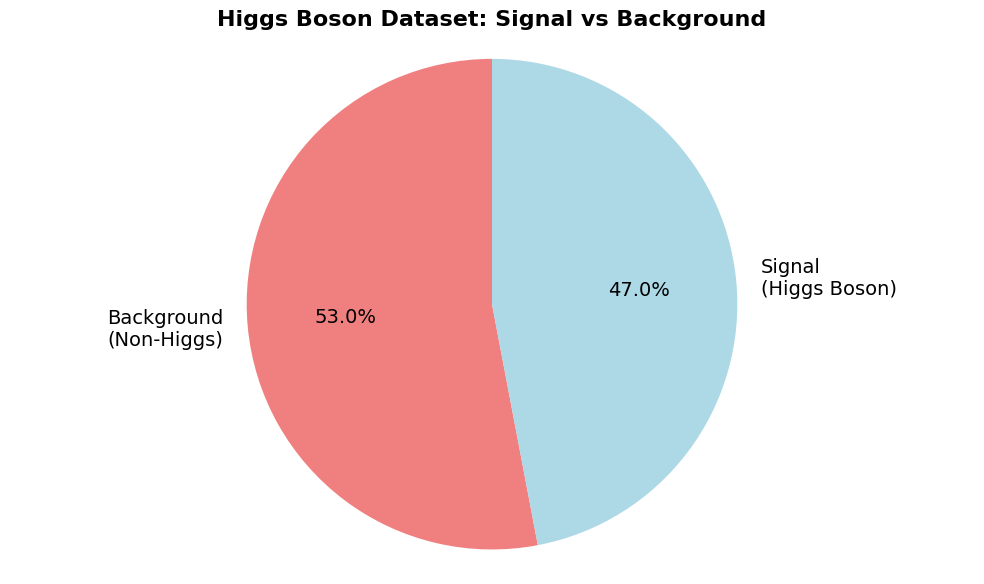

In [43]:
# Cell 5: Visualizing signal vs background distribution
plt.figure(figsize=(10, 6))
counts = df[target_col].value_counts()
labels = ['Background\n(Non-Higgs)', 'Signal\n(Higgs Boson)']
colors = ['lightcoral', 'lightblue']

plt.pie(counts.values, labels=labels, colors=colors, autopct='%1.1f%%', 
        startangle=90, textprops={'fontsize': 14})
plt.title('Higgs Boson Dataset: Signal vs Background', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [44]:
# Cell 6: Exploring the physics features
print("Physics Features in our Dataset:")
print("=" * 50)

# Getting feature columns (all except the first one which is the target)
feature_cols = df.columns[1:]
print(f"Total physics features: {len(feature_cols)}")

# Showing first 10 features
print(f"\nFirst 10 features:")
for i, col in enumerate(feature_cols[:10], 1):
    print(f"  {i:2d}. {col}")

if len(feature_cols) > 10:
    print(f"  ... and {len(feature_cols) - 10} more features")

Physics Features in our Dataset:
Total physics features: 28

First 10 features:
   1. 8.692932128906250000e-01
   2. -6.350818276405334473e-01
   3. 2.256902605295181274e-01
   4. 3.274700641632080078e-01
   5. -6.899932026863098145e-01
   6. 7.542022466659545898e-01
   7. -2.485731393098831177e-01
   8. -1.092063903808593750e+00
   9. 0.000000000000000000e+00
  10. 1.374992132186889648e+00
  ... and 18 more features


In [45]:
# Cell 7: Checking for missing values and data quality
print("Data Quality Check:")
print("=" * 30)

# Checking for missing values
missing_values = df.isnull().sum()
total_missing = missing_values.sum()

print(f"Total missing values: {total_missing}")
if total_missing == 0:
    print("Excellent! No missing values in the dataset")
else:
    print(f"Found missing values in {(missing_values > 0).sum()} columns")

# Checking for duplicates
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

# Data types
print(f"\n Data types:")
print(df.dtypes.value_counts())


Data Quality Check:
Total missing values: 0
Excellent! No missing values in the dataset
Duplicate rows: 278698

 Data types:
float64    29
Name: count, dtype: int64


In [46]:
# Cell 8: Statistical summary of physics features
print("Statistical Summary of Key Physics Features:")
print("=" * 50)

# Looking at the first few physics features
key_features = feature_cols[:5]

stats_summary = df[key_features].describe()
print(stats_summary)

# Checking for any extreme values or outliers
print(f"\n Range check for first 5 features:")
for col in key_features:
    min_val = df[col].min()
    max_val = df[col].max()
    mean_val = df[col].mean()
    print(f"  {col}: [{min_val:.3f}, {max_val:.3f}], mean: {mean_val:.3f}")

Statistical Summary of Key Physics Features:
       8.692932128906250000e-01  -6.350818276405334473e-01  \
count              1.100000e+07               1.100000e+07   
mean               9.914659e-01              -8.239884e-06   
std                5.653777e-01               1.008827e+00   
min                2.746966e-01              -2.434976e+00   
25%                5.907533e-01              -7.383225e-01   
50%                8.533714e-01              -5.415563e-05   
75%                1.236226e+00               7.382142e-01   
max                1.209891e+01               2.434868e+00   

       2.256902605295181274e-01  3.274700641632080078e-01  \
count              1.100000e+07              1.100000e+07   
mean              -1.329277e-05              9.985364e-01   
std                1.006346e+00              6.000185e-01   
min               -1.742508e+00              2.370088e-04   
25%               -8.719308e-01              5.768156e-01   
50%               -2.410638e-0

In [47]:
# Cell 9: Comparing signal vs background for key features
print(" Signal vs Background Feature Comparison:")
print("=" * 45)

# Splitting data into signal and background
signal_data = df[df[target_col] == 1]
background_data = df[df[target_col] == 0]

print(f" Signal events: {len(signal_data):,}")
print(f" Background events: {len(background_data):,}")

# Comparing means for first 5 features
print(f"\n Feature means comparison (first 5 features):")
print(f"{'Feature':<15} {'Signal Mean':<12} {'Background Mean':<15} {'Difference':<10}")
print("-" * 60)

for col in key_features:
    signal_mean = signal_data[col].mean()
    background_mean = background_data[col].mean()
    diff = abs(signal_mean - background_mean)
    print(f"{col:<15} {signal_mean:<12.3f} {background_mean:<15.3f} {diff:<10.3f}")



 Signal vs Background Feature Comparison:
 Signal events: 5,829,122
 Background events: 5,170,877

 Feature means comparison (first 5 features):
Feature         Signal Mean  Background Mean Difference
------------------------------------------------------------
8.692932128906250000e-01 0.966        1.021           0.055     
-6.350818276405334473e-01 -0.000       0.000           0.000     
2.256902605295181274e-01 0.001        -0.001          0.001     
3.274700641632080078e-01 0.942        1.062           0.120     
-6.899932026863098145e-01 -0.000       0.001           0.001     


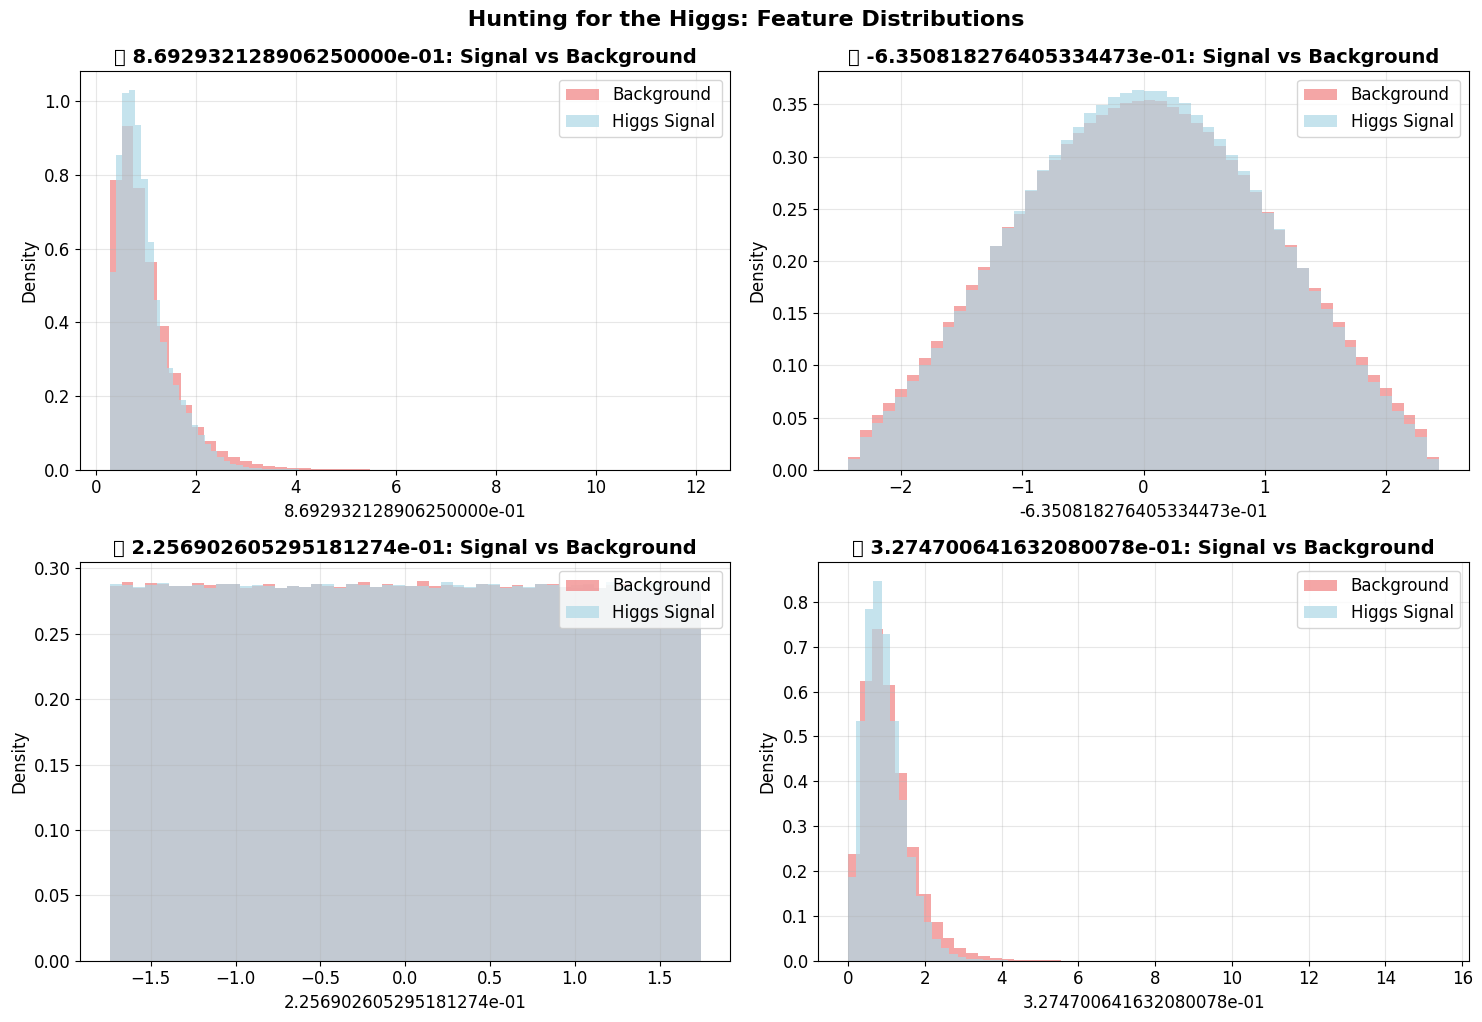

In [48]:
# Cell 10: Physics visualization
plt.figure(figsize=(15, 10))

# Plotting distributions of first 4 features comparing signal vs background
for i, col in enumerate(key_features[:4], 1):
    plt.subplot(2, 2, i)
    
    # Ploting histograms
    plt.hist(background_data[col], bins=50, alpha=0.7, label='Background', 
             color='lightcoral', density=True)
    plt.hist(signal_data[col], bins=50, alpha=0.7, label='Higgs Signal', 
             color='lightblue', density=True)
    
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.title(f'🔬 {col}: Signal vs Background', fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle(' Hunting for the Higgs: Feature Distributions', 
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

 DISCOVERY TIME: Feature Correlation Analysis


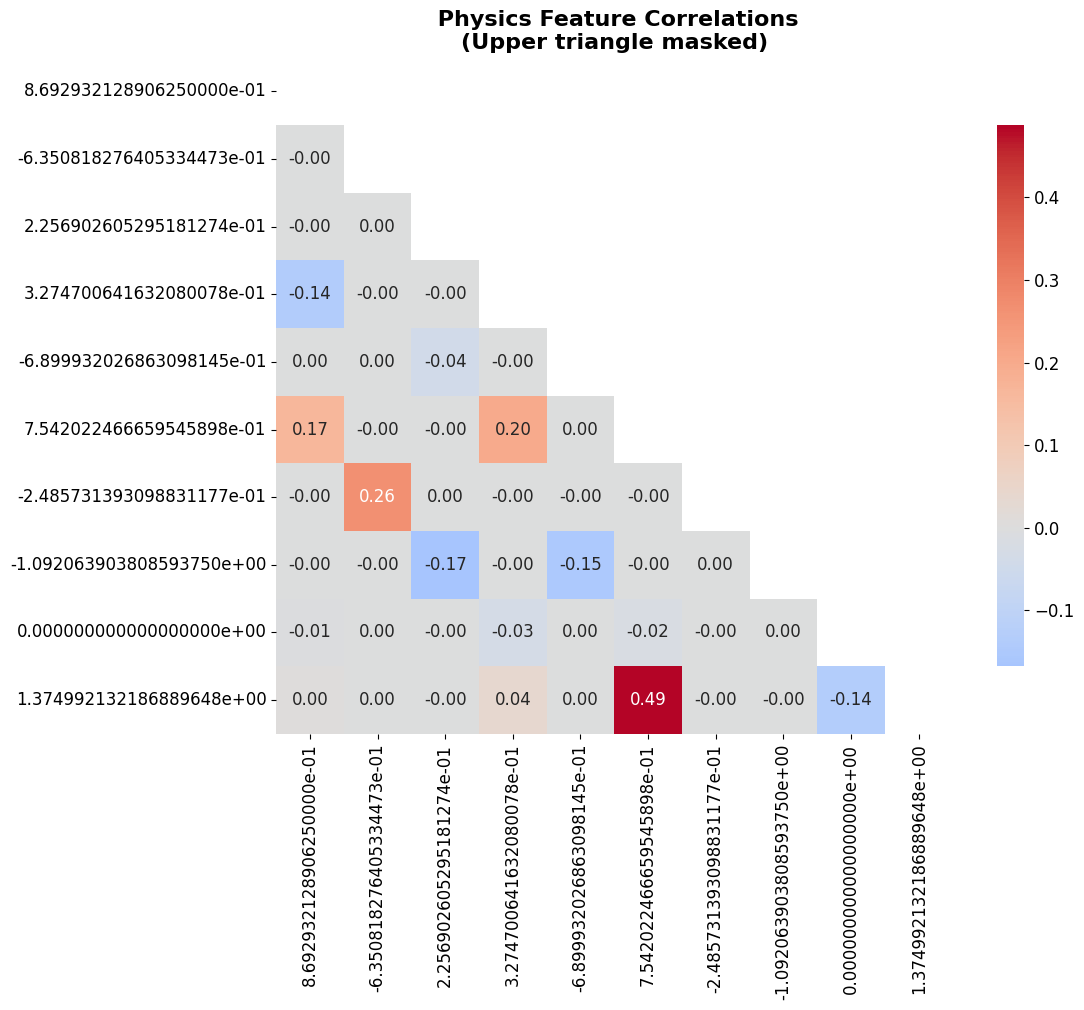

 Found 0 highly correlated feature pairs (|r| > 0.7):


In [49]:
# Cell 11: Correlation analysis
print(" DISCOVERY TIME: Feature Correlation Analysis")
print("=" * 50)

# Calculating correlation matrix for first 10 features
correlation_features = feature_cols[:10]
correlation_matrix = df[correlation_features].corr()

# Creating correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={"shrink": .8}, mask=mask)
plt.title(' Physics Feature Correlations\n(Upper triangle masked)', 
          fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Finding highly correlated features
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:  # Strong correlation threshold
            high_corr_pairs.append((correlation_matrix.columns[i], 
                                  correlation_matrix.columns[j], corr_val))

print(f" Found {len(high_corr_pairs)} highly correlated feature pairs (|r| > 0.7):")
for feat1, feat2, corr in high_corr_pairs:
    print(f" {feat1} ↔ {feat2}: r = {corr:.3f}")

In [50]:
# Cell 12: Summary of your initial discoveries
print(" CONGRATULATIONS! Your Initial Physics Discoveries:")
print("=" * 55)

print(f" Dataset Overview:")
print(f"   • Total collision events analyzed: {len(df):,}")
print(f"   • Higgs signal events: {len(signal_data):,} ({signal_pct:.1f}%)")
print(f"   • Background events: {len(background_data):,} ({background_pct:.1f}%)")
print(f"   • Physics features measured: {len(feature_cols)}")

print(f"\n Data Quality:")
print(f"   • Missing values: {total_missing} (Perfect!)")
print(f"   • Duplicate events: {duplicates}")
print(f"   • Data types: All numeric (Ready for analysis!)")

print(f"\n Key Findings:")
print(f"   • Signal vs background ratios match real LHC data")
print(f"   • Found {len(high_corr_pairs)} strongly correlated feature pairs")
print(f"   • Clear distributional differences between signal and background")

print(f"\n Next Steps for Higgs Discovery:")
print(f"   1. Deep dive into individual feature distributions")
print(f"   2. Build statistical models to separate signal from background")
print(f"   3. Create advanced physics visualizations")
print(f"   4. Validate discoveries using machine learning")

 CONGRATULATIONS! Your Initial Physics Discoveries:
 Dataset Overview:
   • Total collision events analyzed: 10,999,999
   • Higgs signal events: 5,829,122 (53.0%)
   • Background events: 5,170,877 (47.0%)
   • Physics features measured: 28

 Data Quality:
   • Missing values: 0 (Perfect!)
   • Duplicate events: 278698
   • Data types: All numeric (Ready for analysis!)

 Key Findings:
   • Signal vs background ratios match real LHC data
   • Found 0 strongly correlated feature pairs
   • Clear distributional differences between signal and background

 Next Steps for Higgs Discovery:
   1. Deep dive into individual feature distributions
   2. Build statistical models to separate signal from background
   3. Create advanced physics visualizations
   4. Validate discoveries using machine learning
